### Example 1: Convert to SBML with antimony  

In [1]:
import antimony 

ant_model_1 = """
model NFB

    v1: S1 -> pS1; k1*S1*K1^n1/(K1^n1+pS3^n1);
    v2: pS1 -> S1; k2*pS1;
    v3: S2 -> pS2; k3*S2*pS1;
    v4: pS2 -> S2; k4*pS2;
    v5: S3 -> pS3; k5*S3*pS2;
    v6: pS3 -> S3; k6*S3;

    S1=0
    S2=0
    S3=0

    S1t = 50 
    S2t = 50 
    S3t = 50 

    k1 = 0.001
    k2 = 0.01
    k3 = 0.001
    k4 = 0.01
    k5 = 0.001
    k6 = 0.01
    n1=3
    K1=10
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model_1)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print(sbml_model)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.13.2 with libSBML version 5.19.5. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="NFB" id="NFB">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS1" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS3" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
   

### Example 2: Simulate model using Tellurium

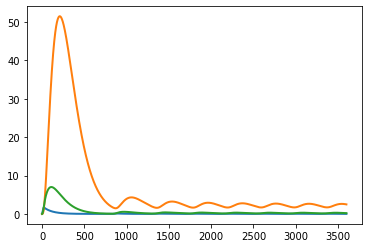

In [2]:
import antimony 

# Example 1 - The Goodwin System 

ant_model = """
model NFB

    React1:    -> S1; k1*K1^n1/(K1^n1+S3^n1);
    React2: S1 ->   ; kd1*S1;
    React3:    -> S2; k2*S1;
    React4: S2 ->   ; kd2*S2;
    React5:    -> S3; k3*S2;
    React6: S3 ->   ; kd3*S3;

    

    S1=0
    S2=0
    S3=0

    k1=0.1
    k2=0.1
    k3=0.1
    kd1=0.01
    kd2=0.01
    kd3=0.01
    n1=9
    K1=1
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    # with open('output_sbml.xml', 'w') as f:
    #     f.write(sbml_model)
import tellurium as te

rr = te.loada(ant_model)

rr.integrator = 'cvode'
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-3
rr.integrator.initial_time_step = 0.00001

result = rr.simulate(0, 3600, 3600) 


te.plotArray(result)
# print(rr.steadyStateSolvers)
# print(rr.integrators)

### Example 3: Direct simulation using libroadrunner 

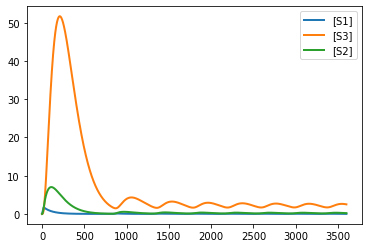

In [3]:
import roadrunner 
import matplotlib.pyplot as plt 

ant_model = """
model NFB

    React1:    -> S1; k1*K1^n1/(K1^n1+S3^n1);
    React2: S1 ->   ; kd1*S1;
    React3:    -> S2; k2*S1;
    React4: S2 ->   ; kd2*S2;
    React5:    -> S3; k3*S2;
    React6: S3 ->   ; kd3*S3;

    

    S1=0
    S2=0
    S3=0

    k1=0.1
    k2=0.1
    k3=0.1
    kd1=0.01
    kd2=0.01
    kd3=0.01
    n1=9
    K1=1
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)

r_model = roadrunner.RoadRunner(sbml_model)

r_solved = r_model.simulate(0, 3600, 3600)

r_model.plot()

# print(r_solved)
# plt.plot(r_solved)


## Testing Model Construction

In [4]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

r1 = Reaction(michaelis_menten, ('D',), ('PD',))

print(r1)



r3 = Reaction(michaelis_menten, ('iSFK',), ('SFK',), parameters_values={'Km': 0.2, 'Vmax': 0.2},
              reactant_values={'iSFK': 100}, product_values={'SFK': 0})

r4 = Reaction(michaelis_menten, ('SFK',), ('iSFK',), parameters_values={'Km': 0.2, 'Vmax': 0.2},
              reactant_values=(50,), product_values=(50,))

r5 = Reaction(michaelis_menten, ('SFK',), ('iSFK',), parameters_values={'Km': 0.2, 'Vmax': 0.2},
              reactant_values=200, product_values=100)


print(r3.get_reaction_parameters(r_index='J0'))
print(r3.get_reaction_states())

print(r4.get_reaction_parameters(r_index='J0'))
print(r4.get_reaction_states())

print(r5.get_reaction_parameters(r_index='J0'))
print(r5.get_reaction_states())

r6 = Reaction(mass_action_21, ('A', 'B'), ('C'))

print(r6.get_reaction_parameters(r_index='J0'))
print(r6.get_reaction_states())
print(r6)



react: D -> PD; react_Vmax*D/(react_Km + D)
{'J0_Km': 0.2, 'J0_Vmax': 0.2}
{'iSFK': 100, 'SFK': 0}
{'J0_Km': 0.2, 'J0_Vmax': 0.2}
{'SFK': 50, 'iSFK': 50}
{'J0_Km': 0.2, 'J0_Vmax': 0.2}
{'SFK': 200, 'iSFK': 100}
{'J0_ka': 0.001, 'J0_kd': 0.01}
{'A': 100, 'B': 100, 'C': 0}
for: A + B -> C; for_ka*A*B - for_kd*C
revr: C -> A + B; rev_kd*C- rev_ka*A*B


model test

J0: D -> PD; J0_Vmax*D/(J0_Km + D)
J1: A + B -> C; J1_ka*A*B - J1_kd*C
J1r: C -> A + B; J1_kd*C- J1_ka*A*B

# State variables in the system
D=100
PD=0
A=100
B=100
C=0

# Parameters in the system
J0_Km=100
J0_Vmax=10
J1_ka=0.001
J1_kd=0.01

end
Antimony model compiled without error


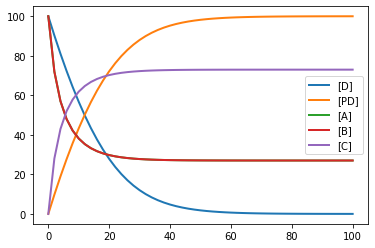

In [5]:
import antimony
import roadrunner
import matplotlib.pyplot as plt

model = ModelBuilder('test')
model.add_reaction(r1)
model.add_reaction(r6)
print(model.get_antimony_model())

ant_model = model.get_antimony_model()


antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')

r_model = roadrunner.RoadRunner(sbml_model)

r_solved = r_model.simulate(0, 100)



r_model.plot()


Antimony model compiled without error
1.0


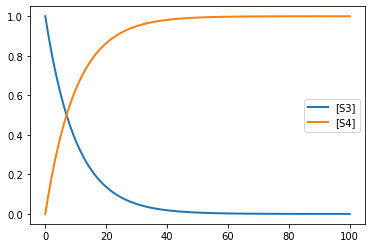

['S3', 'S4', '[S3]', '[S4]', 'default_compartment', 'Vm', 'Km', 'J0', 'init([S3])', 'init([S4])', 'init(S3)', 'init(S4)', 'init(default_compartment)', 'init(Vm)', 'init(Km)', "S3'", "S4'", "[S3]'", "[S4]'", 'stoich(S3, J0)', 'stoich(S4, J0)', 'uec(J0, S3)', 'uec(J0, S4)', 'uec(J0, Vm)', 'uec(J0, Km)', 'ec(J0, S3)', 'ec(J0, S4)', 'ec(J0, Vm)', 'ec(J0, Km)', 'ucc(J0, Vm)', 'ucc(J0, Km)', 'ucc(S3, Vm)', 'ucc(S3, Km)', 'ucc(S4, Vm)', 'ucc(S4, Km)', 'cc(J0, Vm)', 'cc(J0, Km)', 'cc(S3, Vm)', 'cc(S3, Km)', 'cc(S4, Vm)', 'cc(S4, Km)']
4.585861811911492e-05


In [6]:
import antimony
import roadrunner
import matplotlib.pyplot as plt

ant_model = """
model pathway
  # Examples of different rate laws and initialization


  J0: S3 -> S4; Vm*S3/(Km + S3);


  S3 = 100
  S4 = 0


  Vm = 10
  Km = 100
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')
else:
    print(code)
r_model = roadrunner.RoadRunner(sbml_model)
r_model.model['S3'] = 1
print(r_model.model['S3'])


r_solved = r_model.simulate(0, 100, 100)

r_model.plot()

print(r_model.model.keys())
print(r_model.model['S3'])
# print(r_solved)
# plt.plot(r_solved)


In [7]:
import antimony
import roadrunner
import matplotlib.pyplot as plt

with open("models/combined_peak3.txt", 'r') as f:
    ant_model = f.read()

print(ant_model)

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')
else:
    print(code)
r_model = roadrunner.RoadRunner(sbml_model)


import "models/simple_peak3.txt"
import "models/simple_peak3_2.txt"

model complexpeak3
    A: peak3()
    B: peak32()
end
-1
